In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/fast_food_dataset.csv')#1.1

In [ ]:
df.head(10)#1.2

,state,region,fast_food_millions
0,Alabama,South,83
1,Alaska,West,80
2,Arizona,West,81
3,Arkansas,South,45
4,California,West,52
5,Colorado,West,84
6,Connecticut,Northeast,13
7,Delaware,South,39
8,Florida,South,78
9,Georgia,South,29


In [ ]:
df.info()#1.3
df.shape#1.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               100 non-null    object
 1   region              100 non-null    object
 2   fast_food_millions  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


(100, 3)

In [ ]:
df.isnull().sum()#1.4

,0
state,0
region,0
fast_food_millions,0


In [ ]:
df.duplicated().sum()#1.4

np.int64(17)

In [ ]:
df.describe()#1.5

,fast_food_millions
count,100.000000
mean,64.160000
std,27.981856
min,11.000000
25%,42.500000
50%,72.000000
75%,85.000000
max,100.000000


<Axes: xlabel='fast_food_millions', ylabel='Count'>

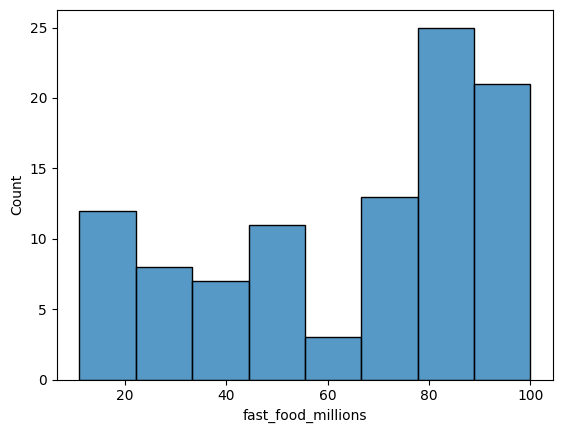

In [ ]:
sns.histplot(data=df,x='fast_food_millions')

In [ ]:
top10=df.sort_values(by='fast_food_millions',ascending=False)
print("Top10:\n",top10.head(10))#2.2
print("Bottom10:\n",top10.sort_values(by='fast_food_millions',ascending=True).head(10))#2.3

Top10:
                    state     region  fast_food_millions
26              Nebraska    Midwest                 100
55  Pennsylvania_extra37  Northeast                 100
41             Tennessee      South                 100
37          Pennsylvania  Northeast                 100
53     Tennessee_extra41      South                 100
91     Tennessee_extra41      South                 100
75  Pennsylvania_extra37  Northeast                 100
57      Nebraska_extra26    Midwest                 100
64         Idaho_extra11       West                  99
11                 Idaho       West                  99
Bottom10:
                    state     region  fast_food_millions
88     Louisiana_extra17      South                  11
17             Louisiana      South                  11
6            Connecticut  Northeast                  13
49               Wyoming       West                  15
34                  Ohio    Midwest                  15
51       Wyoming_extra49     

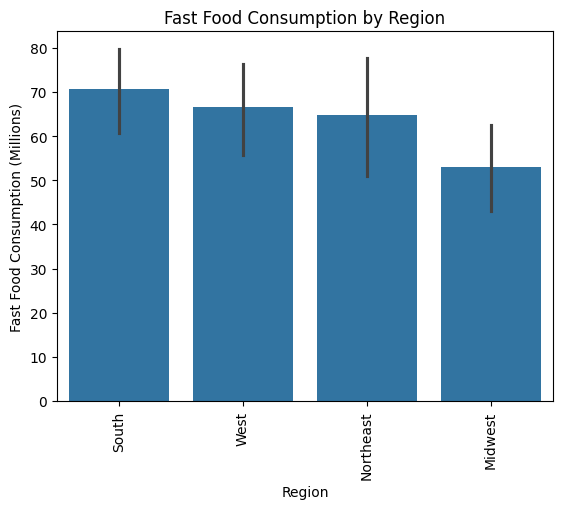

In [ ]:
sns.barplot(data=df,x='region',y='fast_food_millions')
plt.xlabel('Region')
plt.ylabel('Fast Food Consumption (Millions)')
plt.xticks(rotation=90)
plt.title('Fast Food Consumption by Region')
plt.show()#2.4

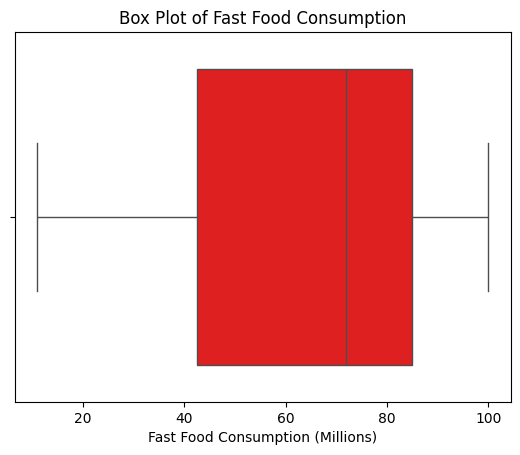

In [ ]:
sns.boxplot(data=df,x='fast_food_millions',color='red')
plt.xlabel('Fast Food Consumption (Millions)')
plt.title('Box Plot of Fast Food Consumption')
plt.show()#2.5

In [ ]:
print("Mean:",df['fast_food_millions'].mean())
print("Median:",df['fast_food_millions'].median())
print("Mode:",df['fast_food_millions'].mode()[0])#3.1

Mean: 64.16
Median: 72.0
Mode: 100


In [ ]:
region=df.groupby(by='region')['fast_food_millions'].sum().idxmax()
value=df.groupby(by='region')['fast_food_millions'].sum().max()
print(region)
print(value)#3.2

South
2192


In [ ]:
national_avg = df['fast_food_millions'].mean()
print("National average spending:", national_avg)
above_avg=df['fast_food_millions']>national_avg
state_above_avg=above_avg.sum()
tot=len(df)
pro=state_above_avg/tot
print("Percentage of states above national average:", pro)#3.3

National average spending: 64.16
Percentage of states above national average: 0.59


In [ ]:
consumption_np=np.array(df['fast_food_millions'])
type(consumption_np)#4.1

numpy.ndarray

In [ ]:
df['health_awareness_factor']=np.random.randint(len(df))#4.2
add=df['fast_food_millions']+df['health_awareness_factor']
sub=df['fast_food_millions']-df['health_awareness_factor']
dot=df['fast_food_millions'].dot(df['health_awareness_factor'])
X=df[['fast_food_millions','health_awareness_factor']]
w=np.array([0.7,0.3])
mat_mul=X@w
print(add)
print(sub)
print(dot)
print(mat_mul)

0     181
1     178
2     179
3     143
4     150
     ... 
95    190
96    185
97    171
98    179
99    180
Length: 100, dtype: int64
0    -15
1    -18
2    -17
3    -53
4    -46
      ..
95    -6
96   -11
97   -25
98   -17
99   -16
Length: 100, dtype: int64
628768
0     87.5
1     85.4
2     86.1
3     60.9
4     65.8
      ... 
95    93.8
96    90.3
97    80.5
98    86.1
99    86.8
Length: 100, dtype: float64


In [ ]:
#Unhealthiness Index = (fast_food_millions / population_in_millions) * 100
import sympy as sp
Food, population = sp.symbols('Food Population')
unhealth_index=(Food/population)*100
derivaties=sp.diff(unhealth_index,Food)
print(derivaties)#5.1

100/Population


In [ ]:
#large population unheathy_index small and vice versa due to inversional proporsanality

In [ ]:
df['above_avg']=above_avg.astype(int)

In [ ]:
df.head()

,state,region,fast_food_millions,health_awareness_factor,above_avg
0,Alabama,South,83,98,1
1,Alaska,West,80,98,1
2,Arizona,West,81,98,1
3,Arkansas,South,45,98,0
4,California,West,52,98,0


In [ ]:
df["population_millions"] = np.random.randint(1, 40, size=len(df))
df['spending']=df['fast_food_millions']/df['population_millions']#6.2

In [ ]:
spending=df.groupby("region")['fast_food_millions'].sum()
region_rank=spending.rank(ascending=False,method="dense")#no gapes same rank for same number
print(region_rank.sort_values())#6.3

region
South        1.0
West         2.0
Midwest      3.0
Northeast    4.0
Name: fast_food_millions, dtype: float64


In [ ]:
df['spending_Quartile']=pd.qcut(df['fast_food_millions'],q=4,labels=['Q1','Q2','Q3','Q4'])
df.head()

,state,region,fast_food_millions,health_awareness_factor,above_avg,population_millions,spending,spending_Quartile
0,Alabama,South,83,98,1,13,6.384615,Q3
1,Alaska,West,80,98,1,30,2.666667,Q3
2,Arizona,West,81,98,1,31,2.612903,Q3
3,Arkansas,South,45,98,0,32,1.406250,Q2
4,California,West,52,98,0,36,1.444444,Q2


In [ ]:
q75=df['fast_food_millions'].quantile(0.75)
top75=df[df['fast_food_millions']>q75]

In [ ]:
top_states_sorted = top75.sort_values(by=["fast_food_millions", "state"], ascending=[False, True])

In [ ]:
region_totals = df.groupby("region")["fast_food_millions"].sum().reset_index()
print(region_totals)

      region  fast_food_millions
0    Midwest                1327
1  Northeast                1229
2      South                2192
3       West                1668


In [ ]:
print(top10['region'].head(1))
print(top10['state'].head(1))

26    Midwest
Name: region, dtype: object
26    Nebraska
Name: state, dtype: object


In [ ]:
national_avg = df["fast_food_millions"].mean()
above_avg = (df["fast_food_millions"] > national_avg).mean() * 100
print("Percentage above national avg:", above_avg, "%")

Percentage above national avg: 59.0 %


In [ ]:
quartile_totals = df.groupby("spending_Quartile",observed=True)["fast_food_millions"].sum()
top_quartile = quartile_totals.idxmax()
print("Top Quartile:", top_quartile, "with total spending", quartile_totals.max())

Top Quartile: Q4 with total spending 2301
